In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

In [5]:
warnings.filterwarnings('ignore')

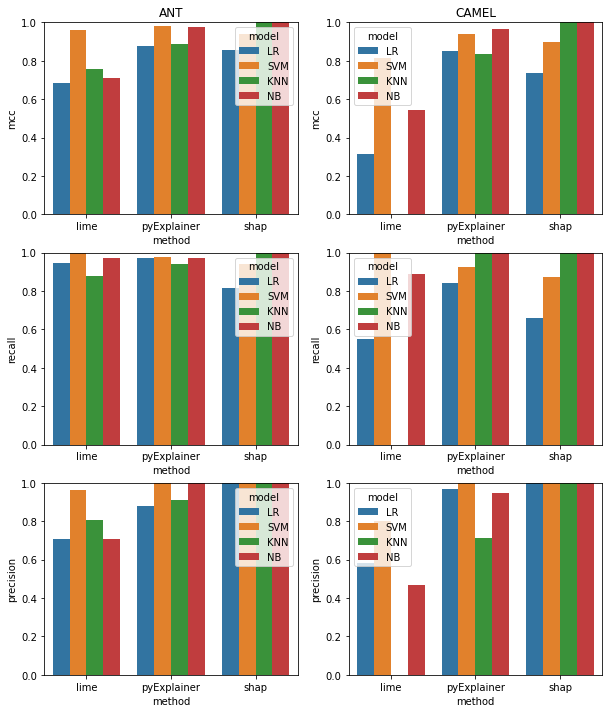

In [22]:
file = 'eval_results/metric1.csv'
metric1ds = pd.read_csv(file)
metric1dsANT = metric1ds[metric1ds.project == 'ANT']
metric1dsCAMEL = metric1ds[metric1ds.project == 'CAMEL']

fig, axs = plt.subplots(3,2,figsize=(10,12))

axs[0,0].set_title('ANT')
axs[0,1].set_title('CAMEL')

plt.setp(axs,ylim=(0, 1))
sns.barplot(data=metric1dsANT, x='method',y='mcc',hue='model',ax=axs[0,0])
sns.barplot(data=metric1dsCAMEL, x='method',y='mcc',hue='model',ax=axs[0,1])
sns.barplot(data=metric1dsANT, x='method',y='recall',hue='model',ax=axs[1,0])
sns.barplot(data=metric1dsCAMEL, x='method',y='recall',hue='model',ax=axs[1,1])
sns.barplot(data=metric1dsANT, x='method',y='precision',hue='model',ax=axs[2,0])
sns.barplot(data=metric1dsCAMEL, x='method',y='precision',hue='model',ax=axs[2,1])

plt.show()

<AxesSubplot:title={'center':'CAMEL'}, xlabel='method', ylabel='avg_recall'>

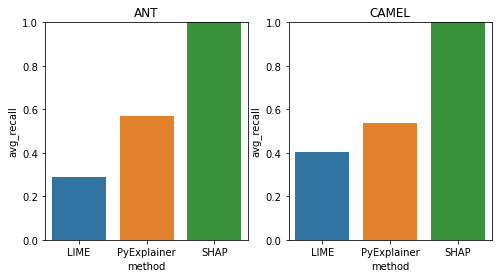

In [21]:
# internal fidelity (with LR as interpretable task model)
file = 'eval_results/metric2.csv'
metric2ds = pd.read_csv(file)
metric2dsANT = metric2ds[metric2ds.project == 'ANT']
metric2dsCAMEL = metric2ds[metric2ds.project == 'CAMEL']

fig, axs = plt.subplots(1,2,figsize=(8,4))
axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[0].set(ylim=(0, 1))
axs[1].set(ylim=(0, 1))

sns.barplot(data=metric2dsANT, x='method',y='avg_recall',ax=axs[0])
sns.barplot(data=metric2dsCAMEL, x='method',y='avg_recall',ax=axs[1])

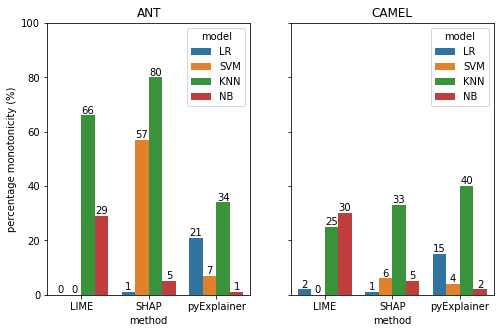

In [3]:
# metric 4 - monotonicity
file = 'eval_results/metric4.csv'
metric1ds = pd.read_csv(file)
metric1dsANT = metric1ds[metric1ds.project == 'ANT']
metric1dsCAMEL = metric1ds[metric1ds.project == 'CAMEL']

fig, axs = plt.subplots(1,2,figsize=(8,5), sharey='row')

axs[0].set_title('ANT')
axs[1].set_title('CAMEL')

plt.setp(axs,ylim=(0, 100))
sns.barplot(data=metric1dsANT, x='method',y='total_monotonicity',hue='model',ax=axs[0])
sns.barplot(data=metric1dsCAMEL, x='method',y='total_monotonicity',hue='model',ax=axs[1])
axs[0].set(ylabel='percentage monotonicity (%)')
axs[1].set(ylabel='')
for i in range(2):
    for container in axs[i].containers:
        axs[i].bar_label(container)
plt.show()


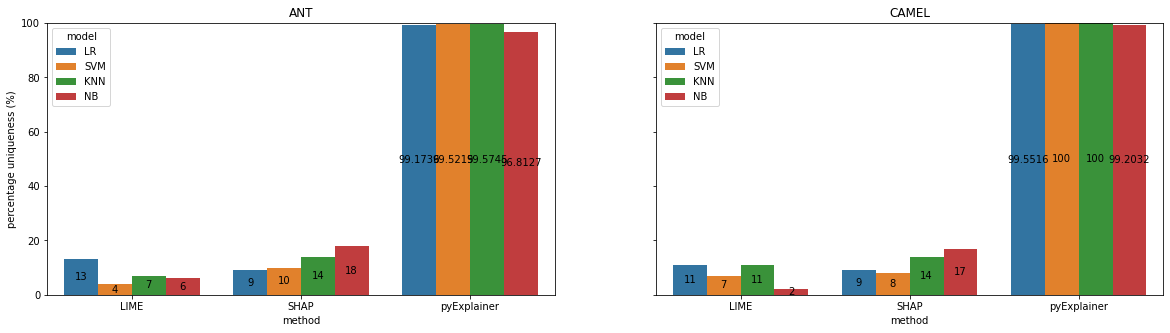

In [8]:
# metric 5 - uniqueness
file = 'eval_results/metric5.csv'
metric5ds = pd.read_csv(file)
metric5dsANT = metric5ds[metric5ds.project == 'ANT']
metric5dsCAMEL = metric5ds[metric5ds.project == 'CAMEL']

fig, axs = plt.subplots(1,2,figsize=(20,5), sharey='row')

axs[0].set_title('ANT')
axs[1].set_title('CAMEL')

plt.setp(axs,ylim=(0, 100))
sns.barplot(data=metric5dsANT, x='method',y='uniqueness',hue='model',ax=axs[0])
sns.barplot(data=metric5dsCAMEL, x='method',y='uniqueness',hue='model',ax=axs[1])
axs[0].set(ylabel='percentage uniqueness (%)')
axs[1].set(ylabel='')
for i in range(2):
    for container in axs[i].containers:
        axs[i].bar_label(container)
plt.show()


In [15]:
def add_median_labels(ax, precision='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{precision}}', ha='center', va='center',
                       fontweight='bold', color='white')

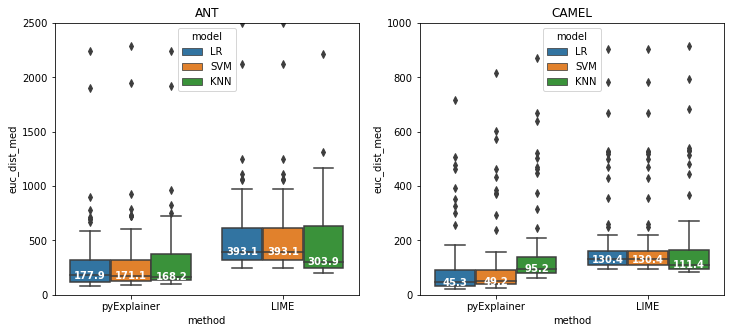

In [18]:
# metric 6 - similarity
file = 'eval_results/metric6.csv'
metric6ds = pd.read_csv(file)
metric6dsANT = metric6ds[metric6ds.project == 'ANT']
metric6dsCAMEL = metric6ds[metric6ds.project == 'CAMEL']


fig, axs = plt.subplots(1,2,figsize=(12,5))

plot1= sns.boxplot(data=metric6dsANT, x='method',y='euc_dist_med',hue='model',ax=axs[0])
plot2= sns.boxplot(data=metric6dsCAMEL, x='method',y='euc_dist_med',hue='model',ax=axs[1])

add_median_labels(plot1)
add_median_labels(plot2)

axs[0].set_title('ANT')
axs[1].set_title('CAMEL')
axs[0].set(ylim=(0, 2500))
axs[1].set(ylim=(0, 1000))


plt.show()

